Importando bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Importando dataset

In [ ]:
df = pd.read_csv('icecream.csv')

Checando dataset

In [ ]:
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [ ]:
num_duplicatas=df.duplicated().sum()

In [ ]:
print(num_duplicatas)

3


In [ ]:
if num_duplicatas > 0:
  print("\n### Exibindo as linhas duplicadas: ###")
  # O keep=False ajuda a mostrar todas as ocorrências da duplicata
  print(df[df.duplicated(keep=False)])


### Exibindo as linhas duplicadas: ###
     Temperature  Revenue
55          27.4      624
73          27.4      624
148         24.7      604
162         25.5      584
246         25.5      584
270         24.7      604


Removendo duplicadas

In [ ]:
df_limpo = df.drop_duplicates()

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  497 non-null    float64
 1   Revenue      497 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


In [ ]:
df_limpo.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [ ]:
df_limpo.duplicated().sum()

np.int64(0)

Resetando índice

In [ ]:
df_limpo.reset_index(drop=True)

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
...,...,...
492,22.3,525
493,32.9,756
494,12.6,307
495,22.4,567


Gráfico

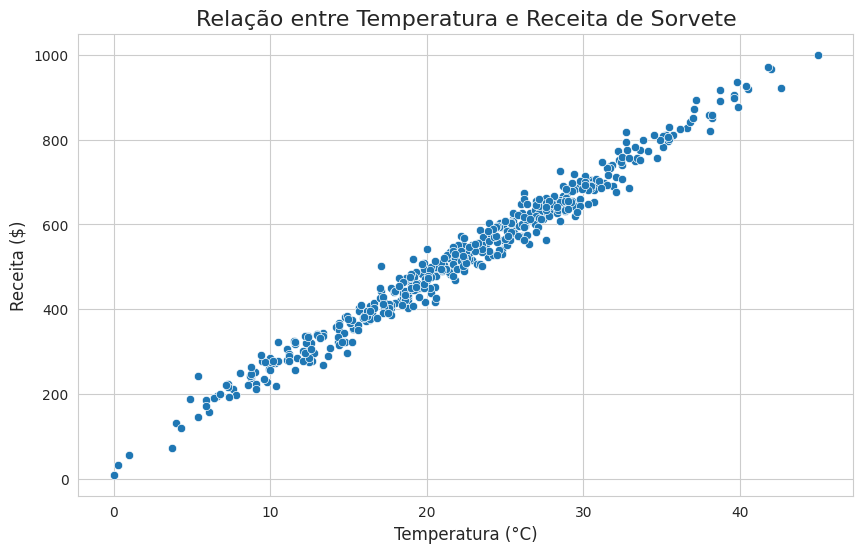

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_limpo, x='Temperature', y='Revenue')
plt.title('Relação entre Temperatura e Receita de Sorvete', fontsize=16)
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Receita ($)', fontsize=12)
plt.show()

Regressão Linear

In [ ]:
print("--- Construindo o Modelo Preditivo ---")

# Preparando os dados
# X precisa ser uma estrutura 2D (um DataFrame), por isso os colchetes duplos [['...']]
# y pode ser uma estrutura 1D (uma Series), por isso os colchetes simples ['...']
X = df_limpo[['Temperature']]
y = df_limpo['Revenue']

# Criando uma instância do modelo
modelo = LinearRegression()

# Treinando o modelo com nossos dados
# Treinando .fit()
modelo.fit(X, y)

print("Modelo treinado com sucesso!")

# Visualizando os parâmetros que o modelo aprendeu
coef_angular_m = modelo.coef_[0]
intercepto_c = modelo.intercept_

# Usando :.2f para formatar o número com apenas 2 casas decimais
print(f"O coeficiente angular (m) da linha é: {coef_angular_m:.2f}")
print(f"O intercepto (c) da linha é: {intercepto_c:.2f}")
print(f"\nConclusão: O modelo aprendeu que para cada 1 grau que a temperatura aumenta, a receita tende a aumentar em R$ {coef_angular_m:.2f}.")

--- Passo 5: Construindo o Modelo Preditivo ---
Modelo treinado com sucesso!
O coeficiente angular (m) da linha é: 21.44
O intercepto (c) da linha é: 44.27

Conclusão: O modelo aprendeu que para cada 1 grau que a temperatura aumenta, a receita tende a aumentar em R$ 21.44.


--- Visualizando o Modelo e Fazendo Previsões ---


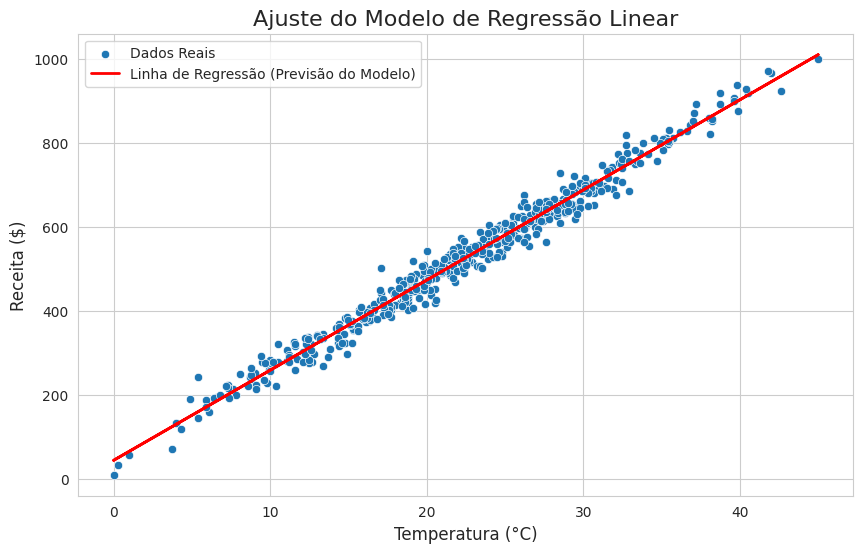


PREVISÃO DO MODELO:
Para uma temperatura de -10°C, a receita prevista é de R$ -170.14


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:

print("--- Visualizando o Modelo e Fazendo Previsões ---")

# --- Desenhando a linha de regressão no gráfico ---

# Criando o gráfico de dispersão novamente
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_limpo, x='Temperature', y='Revenue', label='Dados Reais')

# Usando modelo.predict(X) para gerar os valores de Y previstos pela linha do modelo
# e plotamos essa linha sobre o gráfico
plt.plot(X, modelo.predict(X), color='red', linewidth=2, label='Linha de Regressão (Previsão do Modelo)')

plt.title('Ajuste do Modelo de Regressão Linear', fontsize=16)
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Receita ($)', fontsize=12)
plt.legend() # Mostra as legendas 'Dados Reais' e 'Linha de Regressão'
plt.grid(True)
plt.show()


# --- Usando o modelo para prever um novo valor ---

# Prevendo a receita para um dia com 25°C
temperatura_nova = 25

# Lembrando que o modelo espera um formato 2D, então passamos [[...]]
receita_prevista = modelo.predict([[temperatura_nova]])

# A previsão também vem numa lista, então pegamos o primeiro item com [0]
print(f"\nPREVISÃO DO MODELO:")
print(f"Para uma temperatura de {temperatura_nova}°C, a receita prevista é de R$ {receita_prevista[0]:.2f}")

df_limpo para csv

In [ ]:
df_final_ice_cream = 'df_final_ice_cream.csv'
df_limpo.to_csv(df_final_ice_cream, index=False)